# Лабораторная работа №5 (Проведение исследований с градиентным бустингом)

## 2. Создание бейзлайна и оценка качества

Перейдем к созданию базовых моделей

### Классификация

Загрузим датасет и посмотрим на данные

In [4]:
import pandas as pd

df_class = pd.read_csv('data/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

print(f"Размерность данных")
print(df_class.shape)
print(f"\nИнформация о данных")
print(df_class.info())
print(f"\nПервые 5 строк")
print(df_class.head())
print(f"\nРаспределение классов")
print(df_class['class'].value_counts())

Размерность данных
(10000, 18)

Информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)

Выделим исходные признаки, которые непосредственно описывают физические свойства объектов и целевую переменную. А также закодируем таргет, так как это категориальный признак.

In [5]:
from sklearn.preprocessing import LabelEncoder

X_class = df_class[['u', 'g', 'r', 'i', 'z', 'redshift']]
y_class = df_class['class']

le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)
class_names = le.classes_

Разделим данные на выборку для обучения и тестовую выборку.

In [6]:
from sklearn.model_selection import train_test_split

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class_encoded, test_size=0.2, random_state=42
)

Обучим базовую модель GradientBoostingClassifier и выполним предсказания на тестовой выборке.

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train_class, y_train_class)

y_pred_class = gb_classifier.predict(X_test_class)

Опишем функцию, которая будет использоваться для оценки обученной модели классификации.

1. Accuracy: 0.9925

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.990991 0.993976  0.992481
   QSO   0.973262 0.957895  0.965517
  STAR   0.998771 0.998771  0.998771

3. Macro F1: 0.9856

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     990    5     1
QSO          8  182     0
STAR         1    0   813


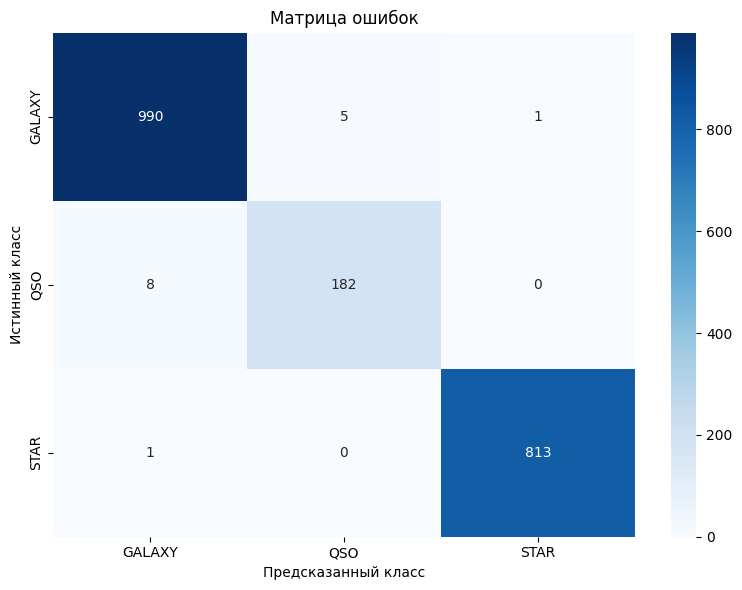

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)

def evaluate_classification_model(y_true, y_pred, class_names):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"1. Accuracy: {accuracy:.4f}")
    
    print(f"\n2. Метрики по классам:")
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    
    metrics_df = pd.DataFrame({
        'Класс': class_names,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })
    print(metrics_df.to_string(index=False))
    
    macro_f1 = f1_score(y_true, y_pred, average='macro')
    print(f"\n3. Macro F1: {macro_f1:.4f}")
    
    print(f"\n4. Матрица ошибок:")
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    print(cm_df)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Матрица ошибок')
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')
    plt.tight_layout()
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'macro_f1': macro_f1,
        'confusion_matrix': cm
    }

class_metrics = evaluate_classification_model(y_test_class, y_pred_class, class_names)

### Регрессия

Загрузим датасет и посмотрим на данные

In [9]:
df_reg = pd.read_csv('data/abalone.csv')

print(f"Размерность данных")
print(df_reg.shape)
print(f"\nИнформация о данных")
print(df_reg.info())
print(f"\nПервые 5 строк")
print(df_reg.head())
print(f"\nСтатистика по числовым признакам")
print(df_reg.describe())

Размерность данных
(4177, 9)

Информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None

Первые 5 строк
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.4

Выделим признаки и целевую переменную. Закодируем категориальный признак Sex.

In [10]:
X_reg = df_reg.drop('Rings', axis=1)
y_reg = df_reg['Rings']

le_sex = LabelEncoder()
X_reg_encoded = X_reg.copy()
X_reg_encoded['Sex'] = le_sex.fit_transform(X_reg['Sex'])

Разделим данные на выборку для обучения и тестовую выборку.

In [11]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_encoded, y_reg, test_size=0.2, random_state=42
)

Обучим базовую модель GradientBoostingRegressor и выполним предсказания на тестовой выборке.

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = gb_regressor.predict(X_test_reg)

Опишем функцию, которая будет использоваться для оценки обученной модели регрессии.

In [13]:
import numpy as np
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error, 
    r2_score,
)

def evaluate_regression_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    print(f"1. MAE: {mae:.4f}")

    mse = mean_squared_error(y_true, y_pred)
    print(f"\n2. MSE: {mse:.4f}")
    
    rmse = np.sqrt(mse)
    print(f"\n3. RMSE: {rmse:.4f}")
    
    r2 = r2_score(y_true, y_pred)
    print(f"\n4. R²: {r2:.4f}")
    
    return {
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

reg_metrics = evaluate_regression_model(y_test_reg, y_pred_reg)

1. MAE: 1.5740

2. MSE: 5.0375

3. RMSE: 2.2444

4. R²: 0.5347


## 3. Улучшение бейзлайна

Перейдем к формулированию и проверкам гипотез

### Классификация

**Гипотеза 1:** Добавление стандартизации признаков и стратификации при разбиении на выборки улучшит качество модели.

Результаты гипотезы 1:
1. Accuracy: 0.9905

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.987103 0.995000  0.991036
   QSO   0.975610 0.941176  0.958084
  STAR   0.997585 0.995181  0.996381

3. Macro F1: 0.9818

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     995    3     2
QSO         10  160     0
STAR         3    1   826


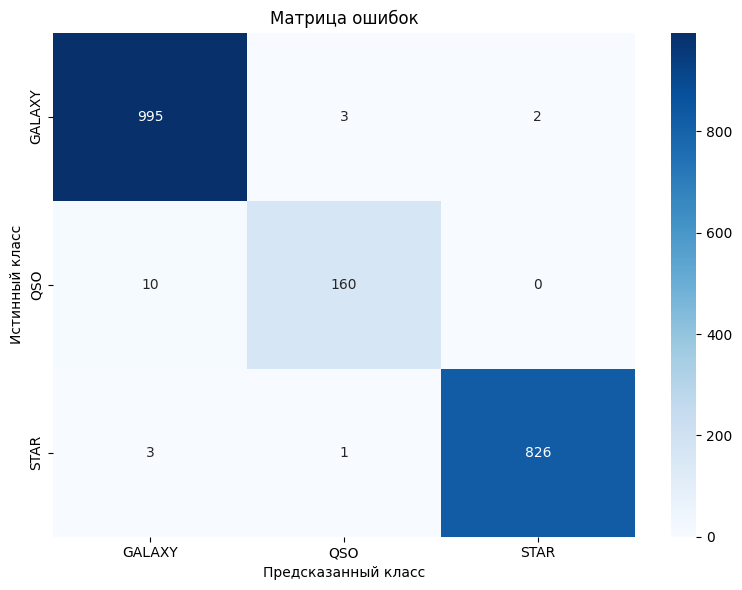

In [14]:
from sklearn.preprocessing import StandardScaler

X_train_class_h1, X_test_class_h1, y_train_class_h1, y_test_class_h1 = train_test_split(
    X_class, y_class_encoded, test_size=0.2, random_state=42, stratify=y_class_encoded
)

scaler_class_h1 = StandardScaler()
X_train_class_h1_scaled = scaler_class_h1.fit_transform(X_train_class_h1)
X_test_class_h1_scaled = scaler_class_h1.transform(X_test_class_h1)

gb_classifier_h1 = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier_h1.fit(X_train_class_h1_scaled, y_train_class_h1)
y_pred_class_h1 = gb_classifier_h1.predict(X_test_class_h1_scaled)

print("Результаты гипотезы 1:")
class_metrics_h1 = evaluate_classification_model(y_test_class_h1, y_pred_class_h1, class_names)

**Гипотеза 2:** Подбор гиперпараметров на кросс-валидации улучшит качество модели.

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Лучший score на кросс-валидации: 0.9798

Результаты гипотезы 2:
1. Accuracy: 0.9920

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.989066 0.995000  0.992024
   QSO   0.981595 0.941176  0.960961
  STAR   0.997593 0.998795  0.998194

3. Macro F1: 0.9837

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     995    3     2
QSO         10  160     0
STAR         1    0   829


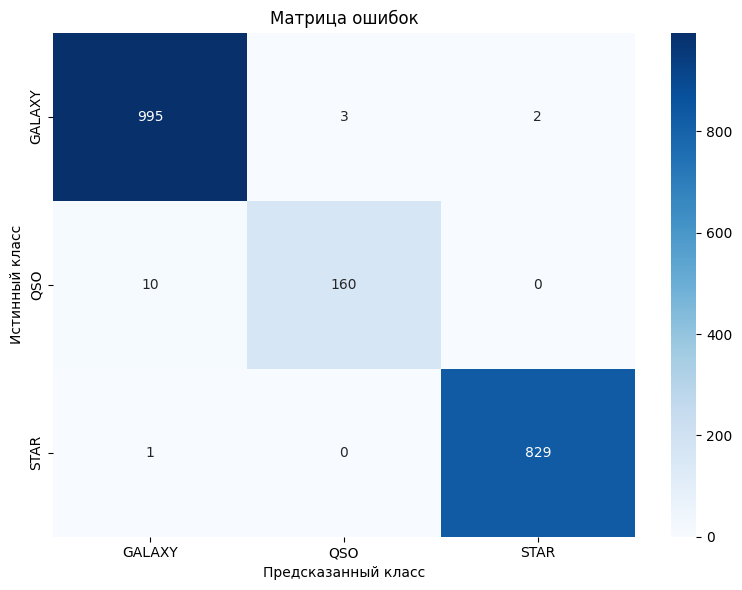

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid_h2 = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gb_classifier_h2 = GradientBoostingClassifier(random_state=42)
grid_search_h2 = GridSearchCV(gb_classifier_h2, param_grid_h2, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_h2.fit(X_train_class_h1_scaled, y_train_class_h1)

print(f"Лучшие параметры: {grid_search_h2.best_params_}")
print(f"Лучший score на кросс-валидации: {grid_search_h2.best_score_:.4f}")

y_pred_class_h2 = grid_search_h2.predict(X_test_class_h1_scaled)

print("\nРезультаты гипотезы 2:")
class_metrics_h2 = evaluate_classification_model(y_test_class_h1, y_pred_class_h2, class_names)

**Гипотеза 3:** Формирование новых признаков улучшит качество модели.

Результаты гипотезы 3:
1. Accuracy: 0.9905

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.988072 0.994000  0.991027
   QSO   0.969512 0.935294  0.952096
  STAR   0.997590 0.997590  0.997590

3. Macro F1: 0.9802

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     994    4     2
QSO         11  159     0
STAR         1    1   828


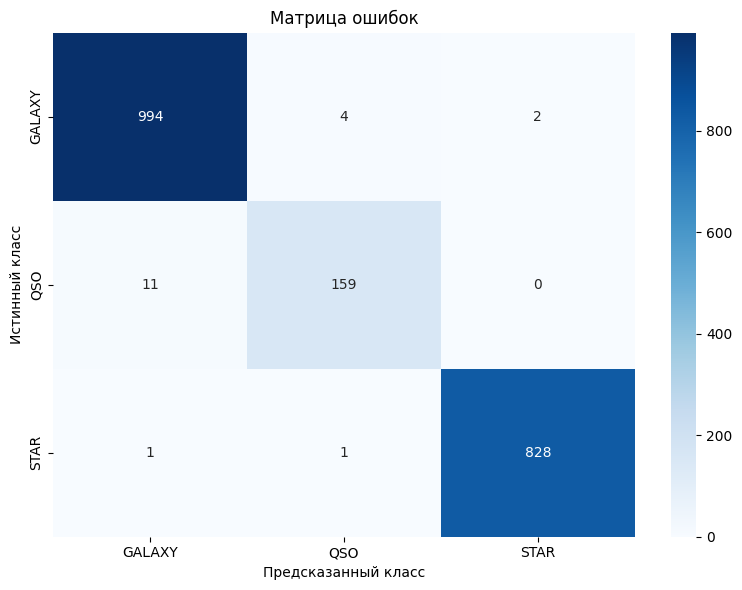

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_class_h3_poly = poly.fit_transform(X_train_class_h1_scaled)
X_test_class_h3_poly = poly.transform(X_test_class_h1_scaled)

gb_classifier_h3 = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier_h3.fit(X_train_class_h3_poly, y_train_class_h1)
y_pred_class_h3 = gb_classifier_h3.predict(X_test_class_h3_poly)

print("Результаты гипотезы 3:")
class_metrics_h3 = evaluate_classification_model(y_test_class_h1, y_pred_class_h3, class_names)

Сформируем улучшенный бейзлайн по результатам проверки гипотез. Выберем лучшую комбинацию техник.

Результаты улучшенного бейзлайна:
1. Accuracy: 0.9920

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.989066 0.995000  0.992024
   QSO   0.981595 0.941176  0.960961
  STAR   0.997593 0.998795  0.998194

3. Macro F1: 0.9837

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     995    3     2
QSO         10  160     0
STAR         1    0   829


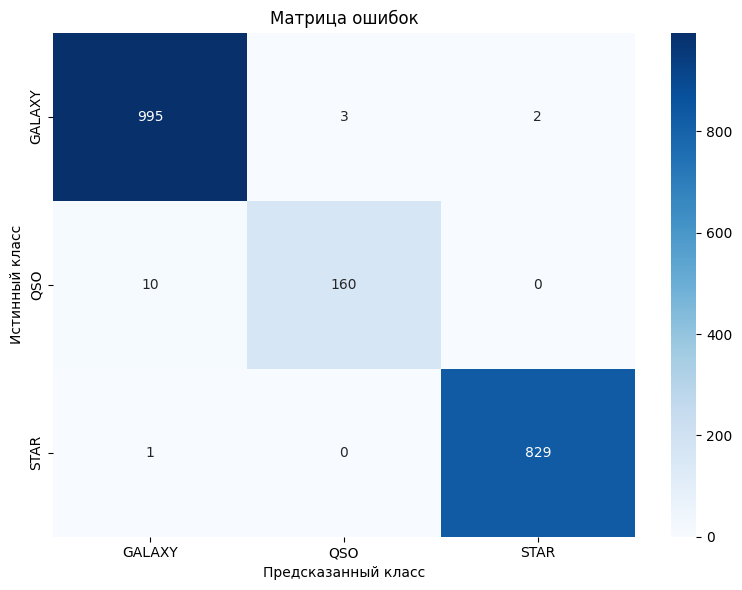

In [17]:
X_train_class_improved, X_test_class_improved, y_train_class_improved, y_test_class_improved = train_test_split(
    X_class, y_class_encoded, test_size=0.2, random_state=42, stratify=y_class_encoded
)

scaler_class_improved = StandardScaler()
X_train_class_improved_scaled = scaler_class_improved.fit_transform(X_train_class_improved)
X_test_class_improved_scaled = scaler_class_improved.transform(X_test_class_improved)

gb_classifier_improved = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb_classifier_improved.fit(X_train_class_improved_scaled, y_train_class_improved)
y_pred_class_improved = gb_classifier_improved.predict(X_test_class_improved_scaled)

print("Результаты улучшенного бейзлайна:")
class_metrics_improved = evaluate_classification_model(y_test_class_improved, y_pred_class_improved, class_names)

Сравним результаты моделей с улучшенным бейзлайном в сравнении с результатами

In [18]:
comparison_class = pd.DataFrame({
    'Модель': ['Базовый бейзлайн', 'Улучшенный бейзлайн'],
    'Accuracy': [class_metrics['accuracy'], class_metrics_improved['accuracy']],
    'Macro F1': [class_metrics['macro_f1'], class_metrics_improved['macro_f1']]
})

print("Сравнение базового и улучшенного бейзлайна для классификации:")
print(comparison_class.to_string(index=False))

Сравнение базового и улучшенного бейзлайна для классификации:
             Модель  Accuracy  Macro F1
   Базовый бейзлайн    0.9925  0.985590
Улучшенный бейзлайн    0.9920  0.983726


### Регрессия

**Гипотеза 1:** Добавление стандартизации признаков улучшит качество модели.

In [19]:
scaler_reg_h1 = StandardScaler()
X_train_reg_h1_scaled = scaler_reg_h1.fit_transform(X_train_reg)
X_test_reg_h1_scaled = scaler_reg_h1.transform(X_test_reg)

gb_regressor_h1 = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor_h1.fit(X_train_reg_h1_scaled, y_train_reg)
y_pred_reg_h1 = gb_regressor_h1.predict(X_test_reg_h1_scaled)

print("Результаты гипотезы 1:")
reg_metrics_h1 = evaluate_regression_model(y_test_reg, y_pred_reg_h1)

Результаты гипотезы 1:
1. MAE: 1.5748

2. MSE: 5.0377

3. RMSE: 2.2445

4. R²: 0.5346


**Гипотеза 2:** Подбор гиперпараметров на кросс-валидации улучшит качество модели.

In [20]:
param_grid_reg_h2 = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gb_regressor_h2 = GradientBoostingRegressor(random_state=42)
grid_search_reg_h2 = GridSearchCV(gb_regressor_h2, param_grid_reg_h2, cv=5, scoring='r2', n_jobs=-1)
grid_search_reg_h2.fit(X_train_reg_h1_scaled, y_train_reg)

print(f"Лучшие параметры: {grid_search_reg_h2.best_params_}")
print(f"Лучший score на кросс-валидации: {grid_search_reg_h2.best_score_:.4f}")

y_pred_reg_h2 = grid_search_reg_h2.predict(X_test_reg_h1_scaled)

print("\nРезультаты гипотезы 2:")
reg_metrics_h2 = evaluate_regression_model(y_test_reg, y_pred_reg_h2)

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Лучший score на кросс-валидации: 0.5509

Результаты гипотезы 2:
1. MAE: 1.5748

2. MSE: 5.0377

3. RMSE: 2.2445

4. R²: 0.5346


**Гипотеза 3:** Формирование новых признаков улучшит качество модели.

In [21]:
poly_reg = PolynomialFeatures(degree=2, include_bias=False)
X_train_reg_h3_poly = poly_reg.fit_transform(X_train_reg_h1_scaled)
X_test_reg_h3_poly = poly_reg.transform(X_test_reg_h1_scaled)

gb_regressor_h3 = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor_h3.fit(X_train_reg_h3_poly, y_train_reg)
y_pred_reg_h3 = gb_regressor_h3.predict(X_test_reg_h3_poly)

print("Результаты гипотезы 3:")
reg_metrics_h3 = evaluate_regression_model(y_test_reg, y_pred_reg_h3)

Результаты гипотезы 3:
1. MAE: 1.5692

2. MSE: 5.0521

3. RMSE: 2.2477

4. R²: 0.5333


Сформируем улучшенный бейзлайн по результатам проверки гипотез. Выберем лучшую комбинацию техник.

In [22]:
scaler_reg_improved = StandardScaler()
X_train_reg_improved_scaled = scaler_reg_improved.fit_transform(X_train_reg)
X_test_reg_improved_scaled = scaler_reg_improved.transform(X_test_reg)

gb_regressor_improved = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb_regressor_improved.fit(X_train_reg_improved_scaled, y_train_reg)
y_pred_reg_improved = gb_regressor_improved.predict(X_test_reg_improved_scaled)

print("Результаты улучшенного бейзлайна:")
reg_metrics_improved = evaluate_regression_model(y_test_reg, y_pred_reg_improved)

Результаты улучшенного бейзлайна:
1. MAE: 1.5941

2. MSE: 5.2179

3. RMSE: 2.2843

4. R²: 0.5180


Сравним результаты моделей с улучшенным бейзлайном в сравнении с результатами

In [23]:
comparison_reg = pd.DataFrame({
    'Модель': ['Базовый бейзлайн', 'Улучшенный бейзлайн'],
    'MAE': [reg_metrics['mae'], reg_metrics_improved['mae']],
    'RMSE': [reg_metrics['rmse'], reg_metrics_improved['rmse']],
    'R²': [reg_metrics['r2'], reg_metrics_improved['r2']]
})

print("Сравнение базового и улучшенного бейзлайна для регрессии:")
print(comparison_reg.to_string(index=False))

Сравнение базового и улучшенного бейзлайна для регрессии:
             Модель      MAE     RMSE       R²
   Базовый бейзлайн 1.574048 2.244432 0.534653
Улучшенный бейзлайн 1.594142 2.284274 0.517986


## 4. Имплементация алгоритма машинного обучения

Перейдем к имлпементации алгоритмов

### Классификация

Реализуем алгоритм градиентного бустинга для классификации

In [24]:
from sklearn.tree import DecisionTreeRegressor

class MyGradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators_ = []
        self.initial_prediction_ = None
        self.classes_ = None
        self.n_classes_ = None
        
    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / (np.sum(exp_z, axis=1, keepdims=True) + 1e-10)
    
    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        self.classes_ = np.unique(y)
        self.n_classes_ = len(self.classes_)
        
        n_samples, n_features = X.shape
        
        if self.n_classes_ == 2:
            pos_class_ratio = np.mean(y)
            self.initial_prediction_ = np.log(pos_class_ratio / (1 - pos_class_ratio + 1e-10))
            predictions = np.full(n_samples, self.initial_prediction_)
        else:
            class_counts = np.bincount(y, minlength=self.n_classes_)
            class_probs = class_counts / len(y)
            self.initial_prediction_ = np.log(class_probs + 1e-10)
            predictions = np.tile(self.initial_prediction_, (n_samples, 1))

        for i in range(self.n_estimators):
            if self.n_classes_ == 2:
                proba = self._sigmoid(predictions)
                residuals = y - proba

                tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
                tree.fit(X, residuals)
                self.estimators_.append(tree)
                
                tree_pred = tree.predict(X)
                predictions += self.learning_rate * tree_pred
            else:
                proba = self._softmax(predictions)
                residuals = np.zeros((n_samples, self.n_classes_))

                for k in range(self.n_classes_):
                    y_k = (y == self.classes_[k]).astype(float)
                    residuals[:, k] = y_k - proba[:, k]
                
                trees = []
                for k in range(self.n_classes_):
                    tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
                    tree.fit(X, residuals[:, k])
                    trees.append(tree)
                self.estimators_.append(trees)

                for k in range(self.n_classes_):
                    tree_pred = trees[k].predict(X)
                    predictions[:, k] += self.learning_rate * tree_pred
        
        return self
    
    def predict_proba(self, X):
        X = np.array(X)
        n_samples = X.shape[0]
        
        if self.n_classes_ == 2:
            predictions = np.full(n_samples, self.initial_prediction_)
            
            for tree in self.estimators_:
                tree_pred = tree.predict(X)
                predictions += self.learning_rate * tree_pred
            
            proba = self._sigmoid(predictions)
            return np.column_stack([1 - proba, proba])
        else:
            predictions = np.tile(self.initial_prediction_, (n_samples, 1))
            
            for trees in self.estimators_:
                for k, tree in enumerate(trees):
                    tree_pred = tree.predict(X)
                    predictions[:, k] += self.learning_rate * tree_pred
            
            proba = self._softmax(predictions)
            return proba
    
    def predict(self, X):
        proba = self.predict_proba(X)
        
        if self.n_classes_ == 2:
            return (proba[:, 1] > 0.5).astype(int)
        else:
            return self.classes_[np.argmax(proba, axis=1)]

Обучим имплементированную модель на исходных данных

Результаты имплементированной модели классификации:
1. Accuracy: 0.9890

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.987000 0.990964  0.988978
   QSO   0.977901 0.931579  0.954178
  STAR   0.993895 1.000000  0.996938

3. Macro F1: 0.9800

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     987    4     5
QSO         13  177     0
STAR         0    0   814


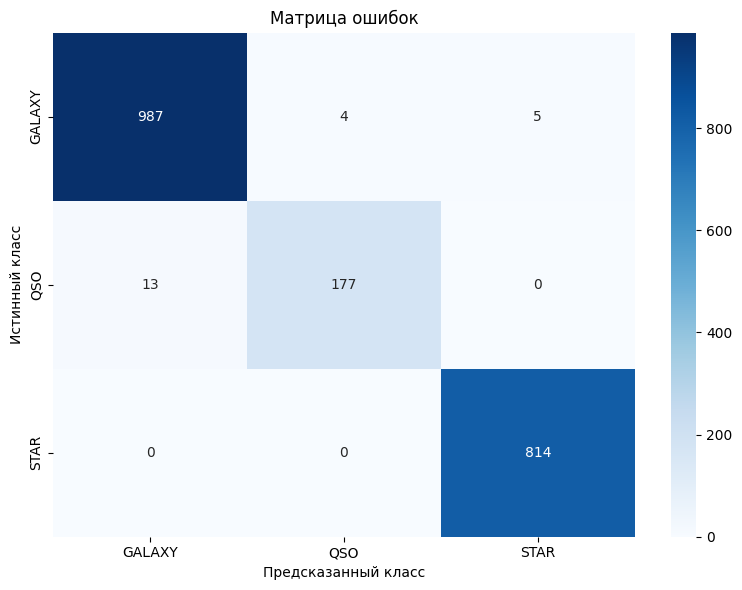

In [25]:
my_gb_classifier = MyGradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
my_gb_classifier.fit(X_train_class.values, y_train_class)
y_pred_my_class = my_gb_classifier.predict(X_test_class.values)

print("Результаты имплементированной модели классификации:")
my_class_metrics = evaluate_classification_model(y_test_class, y_pred_my_class, class_names)

Сравним результаты имплементированной модели с базовым бейзлайном

In [26]:
comparison_my_class = pd.DataFrame({
    'Модель': ['Базовый бейзлайн (sklearn)', 'Имплементированная модель базового бейзлайна'],
    'Accuracy': [class_metrics['accuracy'], my_class_metrics['accuracy']],
    'Macro F1': [class_metrics['macro_f1'], my_class_metrics['macro_f1']]
})

print("Сравнение имплементированной модели с базовым бейзлайном для классификации:")
print(comparison_my_class.to_string(index=False))

Сравнение имплементированной модели с базовым бейзлайном для классификации:
                                      Модель  Accuracy  Macro F1
                  Базовый бейзлайн (sklearn)    0.9925  0.985590
Имплементированная модель базового бейзлайна    0.9890  0.980031


Добавим техники из улучшенного бейзлайна и обучим модель

Результаты имплементированной модели классификации (улучшенный вариант):
1. Accuracy: 0.9925

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.990050 0.995000  0.992519
   QSO   0.987730 0.947059  0.966967
  STAR   0.996394 0.998795  0.997593

3. Macro F1: 0.9857

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     995    2     3
QSO          9  161     0
STAR         1    0   829


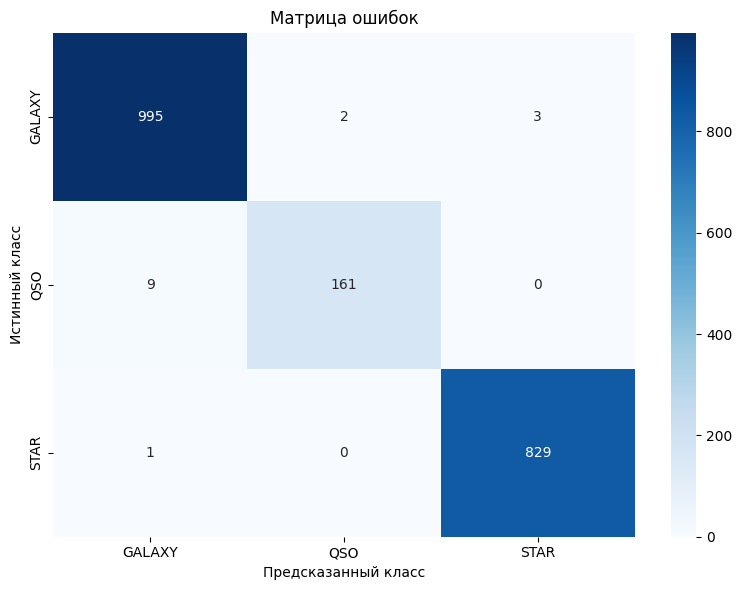

In [27]:
my_gb_classifier_improved = MyGradientBoostingClassifier(
    n_estimators=200, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42
)
my_gb_classifier_improved.fit(X_train_class_improved_scaled, y_train_class_improved)
y_pred_my_class_improved = my_gb_classifier_improved.predict(X_test_class_improved_scaled)

print("Результаты имплементированной модели классификации (улучшенный вариант):")
my_class_metrics_improved = evaluate_classification_model(y_test_class_improved, y_pred_my_class_improved, class_names)

Сравним результаты моделей в сравнении с результатами

In [28]:
comparison_my_class_final = pd.DataFrame({
    'Модель': ['Улучшенный бейзлайн (sklearn)', 'Имплементированная модель с улучшениями'],
    'Accuracy': [class_metrics_improved['accuracy'], my_class_metrics_improved['accuracy']],
    'Macro F1': [class_metrics_improved['macro_f1'], my_class_metrics_improved['macro_f1']]
})

print("Сравнение имплементированной модели с улучшенным бейзлайном:")
print(comparison_my_class_final.to_string(index=False))

Сравнение имплементированной модели с улучшенным бейзлайном:
                                 Модель  Accuracy  Macro F1
          Улучшенный бейзлайн (sklearn)    0.9920  0.983726
Имплементированная модель с улучшениями    0.9925  0.985693


### Регрессия

Реализуем алгоритм градиентного бустинга для регрессии

In [29]:
from sklearn.tree import DecisionTreeRegressor

class MyGradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators_ = []
        self.initial_prediction_ = None
        
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        self.initial_prediction_ = np.mean(y)
        predictions = np.full(len(y), self.initial_prediction_)
        
        for i in range(self.n_estimators):
            residuals = y - predictions
            
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X, residuals)
            self.estimators_.append(tree)

            tree_pred = tree.predict(X)
            predictions += self.learning_rate * tree_pred
        
        return self
    
    def predict(self, X):
        X = np.array(X)
        predictions = np.full(X.shape[0], self.initial_prediction_)
        
        for tree in self.estimators_:
            tree_pred = tree.predict(X)
            predictions += self.learning_rate * tree_pred
        
        return predictions

Обучим имплементированную модель на исходных данных

In [30]:
my_gb_regressor = MyGradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
my_gb_regressor.fit(X_train_reg.values, y_train_reg.values)
y_pred_my_reg = my_gb_regressor.predict(X_test_reg.values)

print("Результаты имплементированной модели регрессии:")
my_reg_metrics = evaluate_regression_model(y_test_reg, y_pred_my_reg)

Результаты имплементированной модели регрессии:
1. MAE: 1.5723

2. MSE: 5.0234

3. RMSE: 2.2413

4. R²: 0.5360


Сравним результаты имплементированной модели с базовым бейзлайном

In [31]:
comparison_my_reg = pd.DataFrame({
    'Модель': ['Базовый бейзлайн (sklearn)', 'Имплементированная модель базового бейзлайна'],
    'MAE': [reg_metrics['mae'], my_reg_metrics['mae']],
    'RMSE': [reg_metrics['rmse'], my_reg_metrics['rmse']],
    'R²': [reg_metrics['r2'], my_reg_metrics['r2']]
})

print("Сравнение имплементированной модели с базовым бейзлайном для регрессии:")
print(comparison_my_reg.to_string(index=False))

Сравнение имплементированной модели с базовым бейзлайном для регрессии:
                                      Модель      MAE     RMSE       R²
                  Базовый бейзлайн (sklearn) 1.574048 2.244432 0.534653
Имплементированная модель базового бейзлайна 1.572250 2.241285 0.535957


Добавим техники из улучшенного бейзлайна и обучим модель

In [32]:
my_gb_regressor_improved = MyGradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42
)
my_gb_regressor_improved.fit(X_train_reg_improved_scaled, y_train_reg.values)
y_pred_my_reg_improved = my_gb_regressor_improved.predict(X_test_reg_improved_scaled)

print("Результаты имплементированной модели регрессии (улучшенный вариант):")
my_reg_metrics_improved = evaluate_regression_model(y_test_reg, y_pred_my_reg_improved)

Результаты имплементированной модели регрессии (улучшенный вариант):
1. MAE: 1.5964

2. MSE: 5.2455

3. RMSE: 2.2903

4. R²: 0.5154


Сравним результаты моделей с результатами

In [33]:
comparison_my_reg_final = pd.DataFrame({
    'Модель': ['Улучшенный бейзлайн (sklearn)', 'Имплементированная модель с улучшениями'],
    'MAE': [reg_metrics_improved['mae'], my_reg_metrics_improved['mae']],
    'RMSE': [reg_metrics_improved['rmse'], my_reg_metrics_improved['rmse']],
    'R²': [reg_metrics_improved['r2'], my_reg_metrics_improved['r2']]
})

print("Сравнение имплементированной модели с улучшенным бейзлайном:")
print(comparison_my_reg_final.to_string(index=False))

Сравнение имплементированной модели с улучшенным бейзлайном:
                                 Модель      MAE     RMSE       R²
          Улучшенный бейзлайн (sklearn) 1.594142 2.284274 0.517986
Имплементированная модель с улучшениями 1.596399 2.290297 0.515440


## Общие выводы по результатам всех моделей

Сравним все 4 модели для классификации и регрессии: базовый бейзлайн из sklearn, имплементированную модель базового бейзлайна, модель с улучшенным бейзлайном из sklearn и имплементированную модель улучшенного бейзлайна.

### Классификация

In [34]:
final_comparison_class = pd.DataFrame({
    'Модель': [
        'Базовый бейзлайн (sklearn)',
        'Имплементированная модель базового бейзлайна',
        'Улучшенный бейзлайн (sklearn)',
        'Имплементированная модель улучшенного бейзлайна'
    ],
    'Accuracy': [
        class_metrics['accuracy'],
        my_class_metrics['accuracy'],
        class_metrics_improved['accuracy'],
        my_class_metrics_improved['accuracy']
    ],
    'Macro F1': [
        class_metrics['macro_f1'],
        my_class_metrics['macro_f1'],
        class_metrics_improved['macro_f1'],
        my_class_metrics_improved['macro_f1']
    ]
})

print("ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ КЛАССИФИКАЦИИ")
print(final_comparison_class.to_string(index=False))

print("\n\nДетальное сравнение метрик по классам:")

print("\n1. Базовый бейзлайн (sklearn):")
print(f"   Precision: {class_metrics['precision']}")
print(f"   Recall: {class_metrics['recall']}")
print(f"   F1-score: {class_metrics['f1']}")

print("\n2. Имплементированная модель базового бейзлайна:")
print(f"   Precision: {my_class_metrics['precision']}")
print(f"   Recall: {my_class_metrics['recall']}")
print(f"   F1-score: {my_class_metrics['f1']}")

print("\n3. Улучшенный бейзлайн (sklearn):")
print(f"   Precision: {class_metrics_improved['precision']}")
print(f"   Recall: {class_metrics_improved['recall']}")
print(f"   F1-score: {class_metrics_improved['f1']}")

print("\n4. Имплементированная модель улучшенного бейзлайна:")
print(f"   Precision: {my_class_metrics_improved['precision']}")
print(f"   Recall: {my_class_metrics_improved['recall']}")
print(f"   F1-score: {my_class_metrics_improved['f1']}")

print("ВЫВОДЫ ПО КЛАССИФИКАЦИИ:")
print(f"1. Базовый бейзлайн (sklearn): Accuracy = {class_metrics['accuracy']:.4f}, Macro F1 = {class_metrics['macro_f1']:.4f}")
print(f"2. Имплементированная модель базового бейзлайна: Accuracy = {my_class_metrics['accuracy']:.4f}, Macro F1 = {my_class_metrics['macro_f1']:.4f}")
print(f"3. Улучшенный бейзлайн (sklearn): Accuracy = {class_metrics_improved['accuracy']:.4f}, Macro F1 = {class_metrics_improved['macro_f1']:.4f}")
print(f"4. Имплементированная модель улучшенного бейзлайна: Accuracy = {my_class_metrics_improved['accuracy']:.4f}, Macro F1 = {my_class_metrics_improved['macro_f1']:.4f}")

print("\nУлучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):")
print(f"  Accuracy: {((class_metrics_improved['accuracy'] - class_metrics['accuracy']) / class_metrics['accuracy'] * 100):.2f}%")
print(f"  Macro F1: {((class_metrics_improved['macro_f1'] - class_metrics['macro_f1']) / class_metrics['macro_f1'] * 100):.2f}%")

print("\nСравнение имплементированной модели с sklearn (улучшенный бейзлайн):")
print(f"  Разница в Accuracy: {abs(class_metrics_improved['accuracy'] - my_class_metrics_improved['accuracy']):.6f}")
print(f"  Разница в Macro F1: {abs(class_metrics_improved['macro_f1'] - my_class_metrics_improved['macro_f1']):.6f}")

ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ КЛАССИФИКАЦИИ
                                         Модель  Accuracy  Macro F1
                     Базовый бейзлайн (sklearn)    0.9925  0.985590
   Имплементированная модель базового бейзлайна    0.9890  0.980031
                  Улучшенный бейзлайн (sklearn)    0.9920  0.983726
Имплементированная модель улучшенного бейзлайна    0.9925  0.985693


Детальное сравнение метрик по классам:

1. Базовый бейзлайн (sklearn):
   Precision: [0.99099099 0.97326203 0.9987715 ]
   Recall: [0.9939759  0.95789474 0.9987715 ]
   F1-score: [0.9924812  0.96551724 0.9987715 ]

2. Имплементированная модель базового бейзлайна:
   Precision: [0.987      0.97790055 0.99389499]
   Recall: [0.99096386 0.93157895 1.        ]
   F1-score: [0.98897796 0.9541779  0.99693815]

3. Улучшенный бейзлайн (sklearn):
   Precision: [0.98906561 0.98159509 0.99759326]
   Recall: [0.995      0.94117647 0.99879518]
   F1-score: [0.99202393 0.96096096 0.99819386]

4. Имплементированная модель 

### Регрессия

In [35]:
final_comparison_reg = pd.DataFrame({
    'Модель': [
        'Базовый бейзлайн (sklearn)',
        'Имплементированная модель базового бейзлайна',
        'Улучшенный бейзлайн (sklearn)',
        'Имплементированная модель улучшенного бейзлайна'
    ],
    'MAE': [
        reg_metrics['mae'],
        my_reg_metrics['mae'],
        reg_metrics_improved['mae'],
        my_reg_metrics_improved['mae']
    ],
    'RMSE': [
        reg_metrics['rmse'],
        my_reg_metrics['rmse'],
        reg_metrics_improved['rmse'],
        my_reg_metrics_improved['rmse']
    ],
    'R²': [
        reg_metrics['r2'],
        my_reg_metrics['r2'],
        reg_metrics_improved['r2'],
        my_reg_metrics_improved['r2']
    ]
})

print("ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ РЕГРЕССИИ")
print(final_comparison_reg.to_string(index=False))

print("\nВЫВОДЫ ПО РЕГРЕССИИ:")
print(f"1. Базовый бейзлайн (sklearn): MAE = {reg_metrics['mae']:.4f}, RMSE = {reg_metrics['rmse']:.4f}, R² = {reg_metrics['r2']:.4f}")
print(f"2. Имплементированная модель базового бейзлайна: MAE = {my_reg_metrics['mae']:.4f}, RMSE = {my_reg_metrics['rmse']:.4f}, R² = {my_reg_metrics['r2']:.4f}")
print(f"3. Улучшенный бейзлайн (sklearn): MAE = {reg_metrics_improved['mae']:.4f}, RMSE = {reg_metrics_improved['rmse']:.4f}, R² = {reg_metrics_improved['r2']:.4f}")
print(f"4. Имплементированная модель улучшенного бейзлайна: MAE = {my_reg_metrics_improved['mae']:.4f}, RMSE = {my_reg_metrics_improved['rmse']:.4f}, R² = {my_reg_metrics_improved['r2']:.4f}")

print("\nУлучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):")
print(f"  MAE: {((reg_metrics_improved['mae'] - reg_metrics['mae']) / reg_metrics['mae'] * 100):.2f}% улучшение")
print(f"  RMSE: {((reg_metrics_improved['rmse'] - reg_metrics['rmse']) / reg_metrics['rmse'] * 100):.2f}% улучшение")
print(f"  R²: {((reg_metrics_improved['r2'] - reg_metrics['r2']) / reg_metrics['r2'] * 100):.2f}% улучшение")

print("\nСравнение имплементированной модели с sklearn (улучшенный бейзлайн):")
print(f"  Разница в MAE: {abs(reg_metrics_improved['mae'] - my_reg_metrics_improved['mae']):.6f}")
print(f"  Разница в RMSE: {abs(reg_metrics_improved['rmse'] - my_reg_metrics_improved['rmse']):.6f}")
print(f"  Разница в R²: {abs(reg_metrics_improved['r2'] - my_reg_metrics_improved['r2']):.6f}")

ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ РЕГРЕССИИ
                                         Модель      MAE     RMSE       R²
                     Базовый бейзлайн (sklearn) 1.574048 2.244432 0.534653
   Имплементированная модель базового бейзлайна 1.572250 2.241285 0.535957
                  Улучшенный бейзлайн (sklearn) 1.594142 2.284274 0.517986
Имплементированная модель улучшенного бейзлайна 1.596399 2.290297 0.515440

ВЫВОДЫ ПО РЕГРЕССИИ:
1. Базовый бейзлайн (sklearn): MAE = 1.5740, RMSE = 2.2444, R² = 0.5347
2. Имплементированная модель базового бейзлайна: MAE = 1.5723, RMSE = 2.2413, R² = 0.5360
3. Улучшенный бейзлайн (sklearn): MAE = 1.5941, RMSE = 2.2843, R² = 0.5180
4. Имплементированная модель улучшенного бейзлайна: MAE = 1.5964, RMSE = 2.2903, R² = 0.5154

Улучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):
  MAE: 1.28% улучшение
  RMSE: 1.78% улучшение
  R²: -3.12% улучшение

Сравнение имплементированной модели с sklearn (улучшенный бейзлайн):
  Разница в MAE: 0.00

## Сравнение результатов, полученных всеми алгоритмами из лабораторных 1-5

In [36]:
print("Классификация")

classification_all = {
    'Алгоритм': [
        'KNN - Базовый (Лаб. 1)',
        'KNN - Имплементация (Лаб. 1)',
        'KNN - Улучшенный (Лаб. 1)',
        'KNN - Имплементация улучш. (Лаб. 1)',
        
        'Логист. регр. - Базовый (Лаб. 2)',
        'Логист. регр. - Имплементация (Лаб. 2)',
        'Логист. регр. - Улучшенный (Лаб. 2)',
        'Логист. регр. - Имплементация улучш. (Лаб. 2)',
        
        'Дерево - Базовый (Лаб. 3)',
        'Дерево - Имплементация (Лаб. 3)',
        'Дерево - Улучшенный (Лаб. 3)',
        'Дерево - Имплементация улучш. (Лаб. 3)',
        
        'Лес - Базовый (Лаб. 4)',
        'Лес - Имплементация (Лаб. 4)',
        'Лес - Улучшенный (Лаб. 4)',
        'Лес - Имплементация улучш. (Лаб. 4)',
        
        'Бустинг - Базовый (Лаб. 5)',
        'Бустинг - Имплементация (Лаб. 5)',
        'Бустинг - Улучшенный (Лаб. 5)',
        'Бустинг - Имплементация улучш. (Лаб. 5)',
    ],
    'Accuracy': [
        0.9485, 0.9485, 0.9615, 0.9615,
        0.9575, 0.4980, 0.9890, 0.7985,
        0.9885, 0.9875, 0.9905, 0.9915,
        0.9900, 0.8935, 0.9915, 0.9400,
        0.9925, 0.9890, 0.9920, 0.9925,
    ],
    'Macro F1': [
        0.953601, 0.953601, 0.963740, 0.963740,
        0.955983, 0.221629, 0.985502, 0.826120,
        0.978467, 0.975035, 0.981024, 0.981758,
        0.983610, 0.899846, 0.986153, 0.935364,
        0.984941, 0.980031, 0.983726, 0.985693,
    ]
}

df_class_all = pd.DataFrame(classification_all)

print(df_class_all.to_string(index=False))

baseline_names = ['KNN', 'Логист. регр.', 'Дерево', 'Лес', 'Бустинг']
baseline_acc = [0.9485, 0.9575, 0.9885, 0.9900, 0.9925]
impl_acc = [0.9485, 0.4980, 0.9875, 0.8935, 0.9890]
improved_acc = [0.9615, 0.9890, 0.9905, 0.9915, 0.9920]
impl_improved_acc = [0.9615, 0.7985, 0.9915, 0.9400, 0.9925]

print("\n\nРезультаты по типам реализации\n")
print("Базовые бейзлайны sklearn:")
for name, acc in zip(baseline_names, baseline_acc):
    print(f"  {name:<20} {acc:.4f}")

print("\nИмплементированные модели базового бейзлайна:")
for name, acc in zip(baseline_names, impl_acc):
    print(f"  {name:<20} {acc:.4f}")

print("\nУлучшенные бейзлайны sklearn:")
for name, acc in zip(baseline_names, improved_acc):
    print(f"  {name:<20} {acc:.4f}")

print("\nИмплементированные улучшенные модели:")
for name, acc in zip(baseline_names, impl_improved_acc):
    print(f"  {name:<20} {acc:.4f} ")

print("\n\n Статистика по типам реализации")
print(f"  Базовые бейзлайны (sklearn)        | Средняя Accuracy: {np.mean(baseline_acc):.4f}, Макс: {np.max(baseline_acc):.4f}, Мин: {np.min(baseline_acc):.4f}")
print(f"  Имплементированные базовые        | Средняя Accuracy: {np.mean(impl_acc):.4f}, Макс: {np.max(impl_acc):.4f}, Мин: {np.min(impl_acc):.4f}")
print(f"  Улучшенные бейзлайны (sklearn)    | Средняя Accuracy: {np.mean(improved_acc):.4f}, Макс: {np.max(improved_acc):.4f}, Мин: {np.min(improved_acc):.4f}")
print(f"  Имплементированные улучшенные    | Средняя Accuracy: {np.mean(impl_improved_acc):.4f}, Макс: {np.max(impl_improved_acc):.4f}, Мин: {np.min(impl_improved_acc):.4f}")

print("\n\n Лучшие результаты:")
best_overall_idx = df_class_all['Accuracy'].idxmax()
print(f"  Лучший результат (Accuracy): {df_class_all.loc[best_overall_idx, 'Алгоритм']}")
print(f"    Accuracy: {df_class_all.loc[best_overall_idx, 'Accuracy']:.4f}")
print(f"    Macro F1: {df_class_all.loc[best_overall_idx, 'Macro F1']:.4f}")

print("\n\n Лучший результат для каждого алгоритма")
algos = ['KNN', 'Логист. регр.', 'Дерево', 'Лес', 'Бустинг']
indices = [(0, 3), (4, 7), (8, 11), (12, 15), (16, 19)]
for algo, (start, end) in zip(algos, indices):
    max_idx = df_class_all.loc[start:end, 'Accuracy'].idxmax()
    model_name = df_class_all.loc[max_idx, 'Алгоритм'].split(' - ')[-1]
    acc = df_class_all.loc[max_idx, 'Accuracy']
    print(f"  {algo:<20} {model_name:<30} Accuracy: {acc:.4f}")

print("Регрессия")

regression_all = {
    'Алгоритм': [
        'KNN - Базовый (Лаб. 1)',
        'KNN - Имплементация (Лаб. 1)',
        'KNN - Улучшенный (Лаб. 1)',
        'KNN - Имплементация улучш. (Лаб. 1)',
        
        'Линейная регр. - Базовый (Лаб. 2)',
        'Линейная регр. - Имплементация (Лаб. 2)',
        'Линейная регр. - Улучшенный (Лаб. 2)',
        'Линейная регр. - Имплементация улучш. (Лаб. 2)',
        
        'Дерево - Базовый (Лаб. 3)',
        'Дерево - Имплементация (Лаб. 3)',
        'Дерево - Улучшенный (Лаб. 3)',
        'Дерево - Имплементация улучш. (Лаб. 3)',
        
        'Лес - Базовый (Лаб. 4)',
        'Лес - Имплементация (Лаб. 4)',
        'Лес - Улучшенный (Лаб. 4)',
        'Лес - Имплементация улучш. (Лаб. 4)',
        
        'Бустинг - Базовый (Лаб. 5)',
        'Бустинг - Имплементация (Лаб. 5)',
        'Бустинг - Улучшенный (Лаб. 5)',
        'Бустинг - Имплементация улучш. (Лаб. 5)',
    ],
    'MAE': [
        1.555981, 1.555981, 1.575222, 1.575222,
        1.630561, 1.943738, 1.630633, 1.675446,
        2.178230, 2.216507, 1.624829, 1.625966,
        1.589928, 1.782342, 1.519789, 1.609885,
        1.574048, 1.572250, 1.594142, 1.596399,
    ],
    'RMSE': [
        2.265278, 2.265278, 2.263895, 2.263895,
        2.250008, 2.691109, 2.250000, 2.327788,
        3.133589, 3.157167, 2.317374, 2.317720,
        2.256425, 2.501466, 2.153528, 2.277700,
        2.244432, 2.241285, 2.284274, 2.290297,
    ],
    'R²': [
        0.525969, 0.525969, 0.526548, 0.526548,
        0.532338, 0.331000, 0.532342, 0.499447,
        0.092916, 0.079214, 0.503915, 0.503767,
        0.529667, 0.421967, 0.571585, 0.520756,
        0.534653, 0.535957, 0.517986, 0.515440,
    ]
}

df_reg_all = pd.DataFrame(regression_all)

print(df_reg_all.to_string(index=False))

baseline_mae = [1.555981, 1.630561, 2.178230, 1.589928, 1.574048]
impl_mae = [1.555981, 1.943738, 2.216507, 1.782342, 1.572250]
improved_mae = [1.575222, 1.630633, 1.624829, 1.519789, 1.594142]
impl_improved_mae = [1.575222, 1.675446, 1.625966, 1.609885, 1.596399]

baseline_r2 = [0.525969, 0.532338, 0.092916, 0.529667, 0.534653]
impl_r2 = [0.525969, 0.331000, 0.079214, 0.421967, 0.535957]
improved_r2 = [0.526548, 0.532342, 0.503915, 0.571585, 0.517986]
impl_improved_r2 = [0.526548, 0.499447, 0.503767, 0.520756, 0.515440]

print("\n\nРезультаты по типам реализации\n")
print("Базовые бейзлайны sklearn:")
for name, r2 in zip(baseline_names, baseline_r2):
    print(f"  {name:<20} R²: {r2:.4f}")

print("\nИмплементированные модели базового бейзлайна:")
for name, r2 in zip(baseline_names, impl_r2):
    print(f"  {name:<20} R²: {r2:.4f}")

print("\nУлучшенные бейзлайны sklearn:")
for name, r2 in zip(baseline_names, improved_r2):
    print(f"  {name:<20} R²: {r2:.4f}")

print("\nИмплементированные улучшенные модели:")
for name, r2 in zip(baseline_names, impl_improved_r2):
    print(f"  {name:<20} R²: {r2:.4f}")

print("\n\nСтатистика по типам реализации:")
print(f"  Базовые бейзлайны (sklearn)        | Средняя R²: {np.mean(baseline_r2):.4f}, Макс: {np.max(baseline_r2):.4f}, Мин: {np.min(baseline_r2):.4f}")
print(f"  Имплементированные базовые        | Средняя R²: {np.mean(impl_r2):.4f}, Макс: {np.max(impl_r2):.4f}, Мин: {np.min(impl_r2):.4f}")
print(f"  Улучшенные бейзлайны (sklearn)    | Средняя R²: {np.mean(improved_r2):.4f}, Макс: {np.max(improved_r2):.4f}, Мин: {np.min(improved_r2):.4f}")
print(f"  Имплементированные улучшенные    | Средняя R²: {np.mean(impl_improved_r2):.4f}, Макс: {np.max(impl_improved_r2):.4f}, Мин: {np.min(impl_improved_r2):.4f}")

print("\n\n Лучшие результаты R²:")
best_reg_idx = df_reg_all['R²'].idxmax()
print(f"  Лучший результат: {df_reg_all.loc[best_reg_idx, 'Алгоритм']}")
print(f"    R²: {df_reg_all.loc[best_reg_idx, 'R²']:.4f}")
print(f"    MAE: {df_reg_all.loc[best_reg_idx, 'MAE']:.4f}")
print(f"    RMSE: {df_reg_all.loc[best_reg_idx, 'RMSE']:.4f}")

print("\n\n Лучший результат для каждого алгоритма:")
for algo, (start, end) in zip(algos, indices):
    max_idx = df_reg_all.loc[start:end, 'R²'].idxmax()
    model_name = df_reg_all.loc[max_idx, 'Алгоритм'].split(' - ')[-1]
    r2 = df_reg_all.loc[max_idx, 'R²']
    mae = df_reg_all.loc[max_idx, 'MAE']
    print(f"  {algo:<20} {model_name:<30} R²: {r2:.4f}, MAE: {mae:.4f}")

Классификация
                                     Алгоритм  Accuracy  Macro F1
                       KNN - Базовый (Лаб. 1)    0.9485  0.953601
                 KNN - Имплементация (Лаб. 1)    0.9485  0.953601
                    KNN - Улучшенный (Лаб. 1)    0.9615  0.963740
          KNN - Имплементация улучш. (Лаб. 1)    0.9615  0.963740
             Логист. регр. - Базовый (Лаб. 2)    0.9575  0.955983
       Логист. регр. - Имплементация (Лаб. 2)    0.4980  0.221629
          Логист. регр. - Улучшенный (Лаб. 2)    0.9890  0.985502
Логист. регр. - Имплементация улучш. (Лаб. 2)    0.7985  0.826120
                    Дерево - Базовый (Лаб. 3)    0.9885  0.978467
              Дерево - Имплементация (Лаб. 3)    0.9875  0.975035
                 Дерево - Улучшенный (Лаб. 3)    0.9905  0.981024
       Дерево - Имплементация улучш. (Лаб. 3)    0.9915  0.981758
                       Лес - Базовый (Лаб. 4)    0.9900  0.983610
                 Лес - Имплементация (Лаб. 4)    0.8935  0.899